# 화면1. 라인별 트렌드 확인해보기

In [159]:
import pickle

with open('output1.pickle', 'rb') as fr:
    output1 = pickle.load(fr)

In [160]:
all_champs_win_rate = output1['all_champs_win_rate']['win'].apply(lambda x : int(x*100)).to_dict()
all_champs_pick_rate = output1['all_champs_pick_rate']
all_champs_ban_rate = output1['all_champs_ban_rate']
top_champs = output1['top_champs']
jug_champs = output1['jug_champs']
mid_champs = output1['mid_champs']
adc_champs = output1['adc_champs']
sup_champs = output1['sup_champs']

In [161]:
jug_champs['LeeSin'] = jug_champs['LeeSin'][0]
for i in ['Kaisa', 'Ezreal','Jhin','Jinx']:
    adc_champs[i] = adc_champs[i][0]

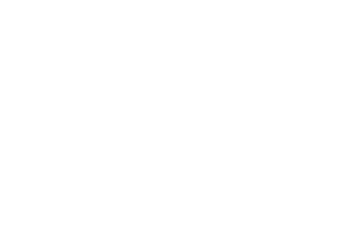

In [162]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(all_champs_win_rate) 
plt.axis('off') 
wordcloud.to_file('./deck/wc_win.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(all_champs_pick_rate) 
plt.axis('off') 
wordcloud.to_file('./deck/wc_pick.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(top_champs) 
plt.axis('off')
wordcloud.to_file('./deck/wc_top.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(jug_champs)
plt.axis('off')
wordcloud.to_file('./deck/wc_jug.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(mid_champs) 
plt.axis('off')
wordcloud.to_file('./deck/wc_mid.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(adc_champs)
plt.axis('off')
wordcloud.to_file('./deck/wc_adc.png')

wordcloud = WordCloud(font_path = './lib/fonts/AppleSDGothicNeoM.ttf ', background_color='white',colormap = "Accent_r").generate_from_frequencies(sup_champs)
plt.axis('off')
wordcloud.to_file('./deck/wc_sup.png')

In [163]:
from PIL import Image
from io import BytesIO
import requests

url = 'http://ddragon.leagueoflegends.com/cdn/11.24.1/img/champion/'

win_df = pd.DataFrame.from_dict(all_champs_win_rate, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(win_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_win.png")
    
top_df = pd.DataFrame.from_dict(top_champs, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(top_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_top.png")
    
jug_df = pd.DataFrame.from_dict(jug_champs, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(jug_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_jug.png")
    
mid_df = pd.DataFrame.from_dict(mid_champs, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(mid_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_mid.png")
    
adc_df = pd.DataFrame.from_dict(adc_champs, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(adc_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_adc.png")
    
sup_df = pd.DataFrame.from_dict(sup_champs, orient='index').sort_values(by=[0],ascending=False)[:3]
for i,champ in enumerate(sup_df.index):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_sup.png")

In [165]:
pd.set_option.row
win_df = pd.DataFrame.from_dict(all_champs_win_rate, orient='index').sort_values(by=[0],ascending=False)
win_df

,0
Tryndamere,55
Velkoz,54
Lissandra,54
FiddleSticks,54
Rell,53
...,...
Illaoi,45
Ryze,45
Taric,45
Nasus,44


# 화면2. 프로게이머처럼 생각해보기

In [98]:
with open('output2.pickle', 'rb') as fr:
    output2 = pickle.load(fr)
print(output2) 

{'decision_tree': 'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="objectives.inhibitor.first <= 0.5\\ngini = 0.5\\nsamples = 105056\\nvalue = [52530, 52526]\\nclass = Lose", fillcolor="#ffffff"] ;\n1 [label="objectives.tower.first <= 0.5\\ngini = 0.374\\nsamples = 65385\\nvalue = [49104, 16281]\\nclass = Lose", fillcolor="#eeab7b"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="objectives.baron.first <= 0.5\\ngini = 0.215\\nsamples = 42040\\nvalue = [36889, 5151]\\nclass = Lose", fillcolor="#e99355"] ;\n1 -> 2 ;\n3 [label="objectives.dragon.first <= 0.5\\ngini = 0.154\\nsamples = 37463\\nvalue = [34307, 3156]\\nclass = Lose", fillcolor="#e78d4b"] ;\n2 -> 3 ;\n4 [label="objectives.champion.first <= 0.5\\ngini = 0.113\\nsamples = 24521\\nvalue = [23045, 1476]\\nclass = Lose", fillcolor="#e78946"] ;\n3 -> 4 ;\n5 [label="gini = 0.089\\nsamples = 15994\\nvalue = [15246, 748]\

In [97]:
import os
from pydotplus.graphviz import graph_from_dot_data
os.environ['PATH'] += os.pathsep + "C:/Program Files/Graphviz 2.44.1/bin"

graph = graph_from_dot_data(output2['decision_tree'])
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of:


# 화면3. 뇌피셜을 검증해보자

In [32]:
with open('output3.pickle', 'rb') as fr:
    output3 = pickle.load(fr)
    print(output3) 

{'get_gameduration_top3': ['Skarner', 'Zyra', 'Sona'], 'get_damageturret_top': ['Ziggs', 'Yorick', 'Tryndamere'], 'get_efficiency_top3': ['Ivern', 'Graves', 'Karthus'], 'get_surrender_top3': (['Kaisa', 'Ezreal', 'LeeSin'], ['Skarner', 'Velkoz', 'Sivir']), 'get_visionscore_top3': ['Bard', 'Pyke', 'Rakan'], 'get_pentakills_top3': ['Samira', 'Kalista', 'MasterYi'], 'get_objectivesstolen_top3': ['Kayn', 'LeeSin', 'Khazix'], 'get_minionskilled_top3': ['Irelia', 'Sivir', 'Kaisa']}


In [37]:
gameduration = output3['get_gameduration_top3']
damageturret = output3['get_damageturret_top']
efficiency = output3['get_efficiency_top3']
x, y = output3['get_surrender_top3'][0], output3['get_surrender_top3'][1]
visionscore = output3['get_visionscore_top3']
pentakills = output3['get_pentakills_top3']
objectivesstolen = output3['get_objectivesstolen_top3']
minionskilled = output3['get_minionskilled_top3']

In [38]:
from PIL import Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import requests
url = 'http://ddragon.leagueoflegends.com/cdn/11.24.1/img/champion/'

for i,champ in enumerate(gameduration):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_gameduration.png")
    
for i,champ in enumerate(damageturret):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_damageturret.png")

for i,champ in enumerate(efficiency):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_efficiency.png")
                         
for i,champ in enumerate(x):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_surrender.png")
        
for i,champ in enumerate(y):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_getsurrender.png")
    
for i,champ in enumerate(visionscore):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_visionscore.png")
                
for i,champ in enumerate(pentakills):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_pentakills.png")
                         
for i,champ in enumerate(objectivesstolen):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_objectivesstolen.png")  
    
for i,champ in enumerate(minionskilled):
    r = requests.get(url+champ+'.png')
    pil_im = Image.open(BytesIO(r.content))
    pil_im.save("./deck/"+str(i)+"_minionskilled.png")            